## implement linear regression with one variable


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
from pylab import *
from scipy import stats

In [2]:
# x is the input feature
# y is the target 
# There is only 1 input feature. There are 2 samples
x = np.array([2.0, 4.0])
y = np.array([300.0, 600.0])
print(x)
print(y)

[2. 4.]
[300. 600.]


In [3]:
#Number of training examples  = m
#x.shape returns a python tuple with the dimensions of the input data 
#x.shape[0] gives the number of examples
#x.shape[1] gives the number of input features 

In [4]:
# m is the number of training examples
print(x.shape)
m = x.shape[0]
print(f"Number of training examples is: {m}")

(2,)
Number of training examples is: 2


(x(𝑖), y(𝑖)) denotes the 𝑖𝑡ℎ training example. 
(x(0), y(0)) is (2.0, 300.0) and (x(1), y(1)) is (4.0, 600.0).



## Plot the data

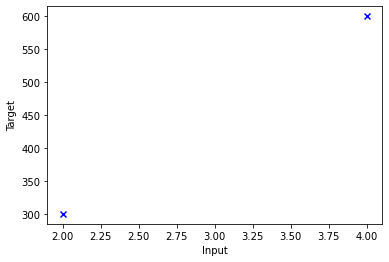

In [5]:
plt.scatter(x, y, marker='x', c='b')
# y-axis label
plt.ylabel('Target')
# x-axis label
plt.xlabel('Input')
plt.show()



Equation of a line
$\large 𝑓(𝑥) = 𝑤.𝑥^{(𝑖)}+𝑏$



In [6]:
#Lets set an arbitrary value for w and b and predict using the linear regression model
w = 100
b = 10

# Using equation of line shown above
f_x = np.dot(w,x)+b

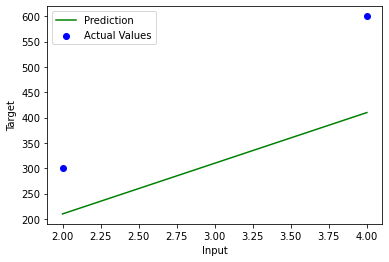

In [7]:
# Plot our model prediction
plt.plot(x, f_x, c='g',label='Prediction')
# Plot the data points
plt.scatter(x, y, marker='o', c='b',label='Actual Values')
# y-axis label
plt.ylabel('Target')
# x-axis label
plt.xlabel('Input')
plt.legend()
plt.show()


What value of w and b will make the line fit the points exactly?

Experiment with different values of w and b.
Try w = 150, b=0

Prediction
With this of w and b, make a prediction. If input = 1.5. What is the prediction of output?

In [8]:
w = 150                        
b = 0    
x_i = 3.7
output = w * x_i + b    

print(output)

555.0


## implement linear regression with one variable but many samples

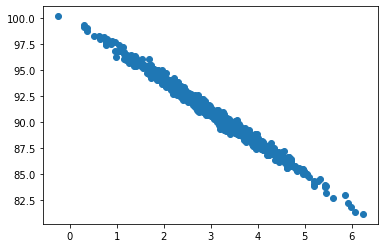

In [9]:
#Create your own dataset of input, output values

#create 1000 samples. This will your input, x
input = np.random.normal(3.0, 1.0, 1000)

#Using the input values, create output values
output = 100 - (input + np.random.normal(0, 0.1, 1000)) * 3

scatter(input, output)


## Lets use a library to fit a line to this data

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(input, output)

In [11]:
r_value ** 2

0.9890762447560798

## Use the equation of the line to make predictions

In [12]:
# Use the slope and intercept of the line obtained from above.
# Construct a line
# For any value of input, the point on the line is our predicted value

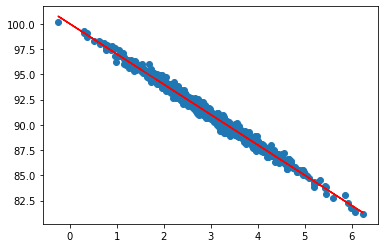

In [13]:
def predict(x):
    return slope * x + intercept

fitLine = predict(input) #Prediction for each value of input

plt.scatter(input, output)
plt.plot(input, fitLine, c='r')
plt.show()

Try increasing the random variation in the test data, and see what effect it has on the r-squared error value

## Gradient Descent, Squared Error Loss function

Simple Equation of a line:

$\large f(x) = wx +b$

When we have multiple features:

 $\large f(\vec {x} ) = w_{1}x_{1} + w_{2}x_{2} +...+ w_{n}x_{n} + b$
 
For each sample $(i)$

 $\large f(\vec{x}^{(i)}) = w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} +...+ w_{n}x_{n}^{(i)} + b$
 
To make it more descriptive

 $\large f_{w,b}(\vec{x}^{(i)}) = w_{1}x_{1}^{(i)} + w_{2}x_{2}^{(i)} +...+ w_{n}x_{n}^{(i)} + b $
 
 To write it in shorthand notation

 $\large f_{w,b}(\vec{x}^{(i)}) = \sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup $
 
 Cost is the measure of error between predicted and actual values
 
 $\large J = \frac{1}{2m} \sum_{i=1}^m \lgroup f_{w,b}(\vec{x}^{(i)}) - y^{(i)}\rgroup^{2}$
 
 We use a Learning Algorithm to update the values for the weights and bias until the cost becomes minimal
 
 Lets look at Gradient Descent:

$\large w_1 = w_1 - \alpha$ .$\frac{\partial J}{\partial w_{1}}$

where 
$\large \frac{\partial J}{\partial w_{1}} =\frac{1}{m} \sum_{i=1}^m \lgroup w_{1}.x_1^{(i)} + w_{2}.x_2^{(i)}+...+ w_{n}.x_n^{(i)} +b-y^{(i)}\rgroup.x_1^{(i)}$

$\large \frac{\partial J}{\partial w_{1}} =\frac{1}{m} \sum_{i=1}^m \lgroup\sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup-y^{(i)}\rgroup.x_1^{(i)}$

$\large \frac{\partial J}{\partial w_{1}} = \frac {1} {m} \sum_{i=1}^m (f_{w,b}(\vec{x}^{(i)}) - y^{(i)}).x_1^{(i)}$


Likewise, when we are evaluating $\frac{\partial J}{\partial w_{2}}$

$\large \frac{\partial J}{\partial w_{2}} =\frac{1}{m} \sum_{i=1}^m \lgroup\sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup-y^{(i)}\rgroup.x_2^{(i)}$

$\large \frac{\partial J}{\partial w_{2}} = \frac {1} {m} \sum_{i=1}^m (f_{w,b}(\vec{x}^{(i)}) - y^{(i)}).x_2^{(i)}$

Where 
 $\large \sum_{j=1}^n \lgroup w_{j}.x_j^{(i)}+b\rgroup = f_{w,b}(\vec{x}^{(i)})$

So, in the general case $\large \frac{\partial J}{\partial w_{n}} = \frac {1} {m} \sum_{i=1}^m (f_{w,b}(\vec{x}^{(i)}) - y^{(i)}).x_n^{(i)}$

In [14]:
#Example done during lecture. Please check lecture video to understand how to provide the input and output 
# a. when it is a single input feature and many samples
# b. when it is multiple input features and many samples

In [21]:
#[0,2,3] -> 6 1st sample
#[1,2,4] -> 8 2nd sample
#[3,4,7] -> 15 3rd sample

#x1 x2 x3   ouptut
#0  2  3 ->   5     sample 1
#1  2  4 ->   6     sample 2
#3  2  5 ->   2     sample 3